In [1]:
import CNN2Head_input
import tensorflow as tf
import numpy as np
import BKNetStyle
from const import *
import cv2

from IPython.display import Image, display

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
sess = tf.InteractiveSession()
x = tf.placeholder(tf.float32, [None, 48, 48, 1])

y_smile_conv, y_gender_conv, y_age_conv, phase_train, keep_prob = BKNetStyle.BKNetModel(x)

Restore model
INFO:tensorflow:Restoring parameters from ./save/current/model.ckpt
OK


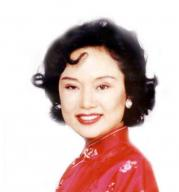

Smile: Yes [[ 0.00668042  0.99331963]]
Gender: Female [[ 0.70619285  0.29380712]]
Age: Middle (30 <= age <45) [[ 0.34444451  0.44706547  0.17603277  0.0324572 ]]


In [9]:
PATH = '/home/ubuntu/coding/cnn/datasets/genki4k/files/file0009.jpg'
img = cv2.imread(PATH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(48, 48))

img = (img - 128) / 255.0
T = np.zeros([48, 48, 1])
T[:, :, 0] = img
test_img = []
test_img.append(T)
test_img = np.asarray(test_img)

print('Restore model')
saver = tf.train.Saver()
saver.restore(sess, SAVE_FOLDER + 'model.ckpt')
print('OK')

display(Image(filename = PATH, width=100, height=100))

predict_y_smile_conv = sess.run(y_smile_conv, feed_dict={x: test_img, phase_train: False, keep_prob: 1})
predict_y_gender_conv = sess.run(y_gender_conv, feed_dict={x: test_img, phase_train: False, keep_prob: 1})
predict_y_age_conv = sess.run(y_age_conv, feed_dict={x: test_img, phase_train: False, keep_prob: 1})

smile_label = "No " if np.argmax(predict_y_smile_conv)==0 else "Yes "
gender_label = "Female " if np.argmax(predict_y_gender_conv)==0 else "Male "
argmax_predict_age = np.argmax(predict_y_age_conv)
if argmax_predict_age==0:
    age_label = "Young (age < 30yrs) "
elif argmax_predict_age==1:
    age_label = "Middle (30 <= age <45) "
elif argmax_predict_age==2:
    age_label = "Old (45 <= age < 60) "
else :
    age_label = "Very Old (60 <= age) "

print('Smile: ' + smile_label + str(predict_y_smile_conv))
print('Gender: ' + gender_label + str(predict_y_gender_conv))
print('Age: ' + age_label + str(predict_y_age_conv))

Restore model
INFO:tensorflow:Restoring parameters from ./save/current/model.ckpt
OK


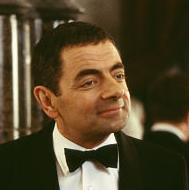

Smile: Yes [[ 0.00149914  0.99850082]]
Gender: Male [[ 0.24222387  0.75777608]]
Age: Middle (30 <= age <45) [[ 0.11998766  0.42773849  0.35627618  0.09599768]]


In [7]:
PATH = '/home/ubuntu/coding/cnn/datasets/imdb_crop/00/nm0000100_rm3653409024_1955-1-6_2003.jpg'
img = cv2.imread(PATH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(48, 48))

img = (img - 128) / 255.0
T = np.zeros([48, 48, 1])
T[:, :, 0] = img
test_img = []
test_img.append(T)
test_img = np.asarray(test_img)

print('Restore model')
saver = tf.train.Saver()
saver.restore(sess, SAVE_FOLDER + 'model.ckpt')
print('OK')

display(Image(filename = PATH, width=100, height=100))

predict_y_smile_conv = sess.run(y_smile_conv, feed_dict={x: test_img, phase_train: False, keep_prob: 1})
predict_y_gender_conv = sess.run(y_gender_conv, feed_dict={x: test_img, phase_train: False, keep_prob: 1})
predict_y_age_conv = sess.run(y_age_conv, feed_dict={x: test_img, phase_train: False, keep_prob: 1})

smile_label = "No " if np.argmax(predict_y_smile_conv)==0 else "Yes "
gender_label = "Female " if np.argmax(predict_y_gender_conv)==0 else "Male "
argmax_predict_age = np.argmax(predict_y_age_conv)
if argmax_predict_age==0:
    age_label = "Young (age < 30yrs) "
elif argmax_predict_age==1:
    age_label = "Middle (30 <= age <45) "
elif argmax_predict_age==2:
    age_label = "Old (45 <= age < 60) "
else :
    age_label = "Very Old (60 <= age) "

print('Smile: ' + smile_label + str(predict_y_smile_conv))
print('Gender: ' + gender_label + str(predict_y_gender_conv))
print('Age: ' + age_label + str(predict_y_age_conv))